<a href="https://colab.research.google.com/github/teteumac/Analise-em-FAE/blob/main/MonteCarlo_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício 1**

Escreva um código que estime a área de um disco unitário usando o método Monte Carlo de acerto ou erro. Sabemos que o raio do disco unitário é 1, portanto, o círculo unitário está inscrito em um quadrado de comprimento 2. Dica: gere amostras dentro desse quadrado e conte o número de pontos que caem dentro do disco. Para testar se o ponto está dentro (hit) ou fora (miss) do disco, basta medir a distância da amostra da origem (o centro do disco unitário) e verificar se essa distância é menor (ou igual) do que o raio do disco (que é igual a 1 para um disco unitário).

Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pylab as pl
%matplotlib inline

Número de pontos usados

In [ ]:
n=100000

**x** e **y** são conjuntos de pontos que serão distribuidos entre os eixos bidimensionais nos intervalos +1 e -1 como mostra a figura abaixo.

In [ ]:
x=np.random.uniform(low=-1,high=1, size=n)
y=np.random.uniform(low=-1,high=1, size=n)
 
d = ( (x**2)+(y**2))**0.5

Area = 4*sum(d<=1)/n

In [ ]:
Area

3.14544

Fazemos ums discriminação dos valores que são menores ou iguais e maiores que d

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


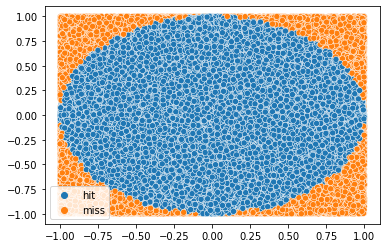

In [ ]:
inout=np.where(d<=1,'hit','miss')
 
sns.scatterplot(x,y,hue=inout,legend=True)

In [ ]:
print( 'number of elements inside of the circle --> ', inout[inout=='hit'].size, 'dots blues' )

number of elements inside of the circle -->  78636 dots blues


# **Exercício 2**

Avalie a integral usando os dois métodos $\int_{0}^{3} (1 - x^{2})^{2} dx$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Criando uma função que retorne a função de interesse e em seguida, plotamos a sua forma

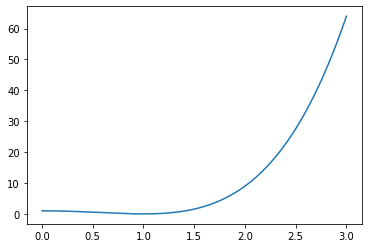

In [ ]:
def function(x):
    return (1-x**2)**2

X=np.linspace(0,3,1000)
plt.plot(X,function(X))
plt.show()

Aqui, fazemos a função que retorne o resultado da integração via método de monte carlo

In [ ]:
def integrate(x1,x2,func=function,n=100000):
    X=np.linspace(x1,x2,10000)
    y1=0
    y2=max((func(X)))+1
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)


Criando um dataframe que junta as informações dos resultados para fazer o plot de separação dos pontos que cai abaixo da curva da função

In [ ]:
_,x,y,c=integrate(0,3,n=10000)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

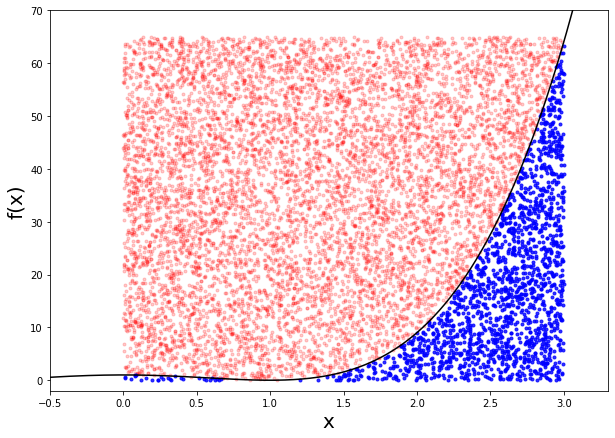

In [ ]:
X=np.linspace(-1,5,1000)
plt.figure(figsize=(10,7))
plt.plot(X,function(X), color = 'black')
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red',marker='.',alpha = 0.2)
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue',marker='.', alpha = 0.8)
plt.ylim(-2,70)
plt.xlim(-0.5,3.3)
plt.xlabel('x',fontsize = 20)
plt.ylabel('f(x)',fontsize = 20)
plt.show()

Nós temos o retangulo que conhecemos o calculo da sua área e que contem a área de interesse. 
A área sob a função é uma fração da área do retângulo para a região em azul.
Em seguida, contamos o número de pontos que estão abaixo da função e quantos estão acima. A proporção dessa região sob a função será 
aproximadamente equivalente à proporção da área sob a curva.
Em seguida, multiplicamos essa proporção pela área do retângulo e temos nossa resposta aproximada.
A função *integrate* faz isso.
Abaixo, printamos o valor com os intervalos de integração.

In [ ]:
print('Monte Carlo Resultado --> ',integrate(0,3)[0])

Monte Carlo Result -->  33.40935


# **Exercício 3**
Escreva um código para calcular a seção transversal diferencial do espalhamento de Rutherford

$\dfrac{d \sigma}{d \Omega} = \left ( \dfrac{e^{2}}{8 \pi \epsilon_{0} m v_{0}^{2}} \right ) \dfrac{1}{\sin^{4}(\theta/2)} $ --> Seção transversal diferencial

In [ ]:
import scipy.constants # pacotes responsável pelas constantes físicas que iremos aplicar na função

Criamos uma função que permite calcular a seção de choque diferencial para o espalhamento de Ruthenford 

In [ ]:
def cross_section(x):
    m  = 3.7273794066 # massa da partícula GeV
    v0 = scipy.constants.c / 10  # velocidade da partícula alpha ( 10 % da velocidade da luz no vácuo)
    return ( scipy.constants.e**2 / ( 8 * scipy.constants.pi * scipy.constants.epsilon_0 * m * v0**2 )**2 ) * 1 / ( np.sin(x/2) )**4 

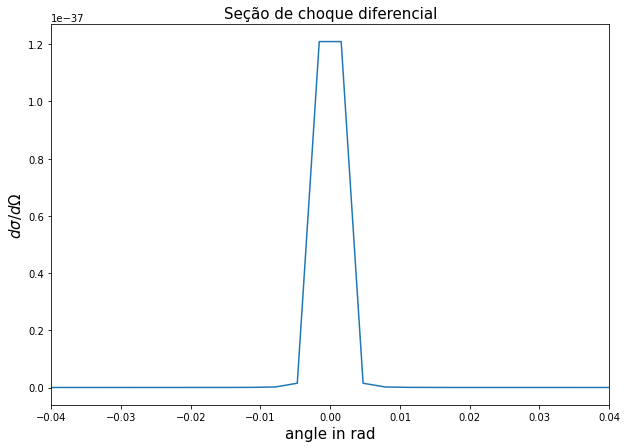

In [ ]:
X=np.linspace(-scipy.constants.pi/2,scipy.constants.pi/2,1000) # distribuição de 1000 intervalos iguais entre -pi,+pi 
plt.figure(figsize=(10,7))
plt.plot(X,cross_section(X))
plt.xlim(-0.04,0.04)
plt.title("Seção de choque diferencial",fontsize = 15)
plt.ylabel("$d \sigma / d \Omega$", fontsize = 15)
plt.xlabel("angle in rad" ,  fontsize = 15)
plt.show()